# Exercice sur les métriques

Pour l'exercice on va réutiliser le jeu de données sur le diabète.

Rappel concernant la target "diabete" : 
- 0 représente une personne n'ayant pas le diabète
- 1 représente une personne ayant le diabète

Dans le bout de code ci-dessous, on importe deux modèles différents que l'on entraîne sur le dataset.
Les différents imports nécessaires pour l'exercice sont également déjà fait. Ceux dont vous aurez besoin sont importés de `numpy`, `sklearn.metrics` et `sklearn.model_selection`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_predict

data = pd.read_csv("dataset/pima-indians-diabetes.data.csv", header=None, names=["pregnancies", "glucose", "blood_pressure", "skin_thickness", "insulin", "bmi", "diabete_pedigree", "age", "diabete"])

columns = ["blood_pressure", "skin_thickness", "insulin", "bmi", "diabete_pedigree", "age"]
imputer = KNNImputer(missing_values=0, n_neighbors=5)
columns_imputed = imputer.fit_transform(data[columns])
data[columns] = columns_imputed

X = data.drop("diabete", axis=1)
y = data.diabete

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=y)

tr_clf = DecisionTreeClassifier(random_state=42)
tr_clf.fit(X_train, y_train)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)

C:\Users\Shadow\AppData\Local\Temp\ipykernel_11840\1400339245.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


RandomForestClassifier(max_depth=10, random_state=42)

## Exercice :

A partir de l'étape 2, les différentes tâches devront être effectuées pour les deux modèles `sgd_clf` et `rf_clf`.

#### 1. Analyser la répartition de la target

In [2]:
# Utiliser le dataframe data ou y

display(data["diabete"].value_counts())
display(data["diabete"].value_counts(normalize=True))

diabete
0    500
1    268
Name: count, dtype: int64

diabete
0    0.651042
1    0.348958
Name: proportion, dtype: float64

Qu'est ce qu'on peut dire sur la répartition ?

On remarque que les classes sont déséquilibrées : 
- 65.1% des individus n'ont pas de diabète
- 34.9% des individus ont le diabète

### 2. Réaliser les prédictions sur le training set

In [21]:
y_train_pred_sgd = cross_val_predict(sgd_clf, X_train, y_train)
y_train_pred_rf = cross_val_predict(rf_clf, X_train, y_train)
y_train_pred_tr = cross_val_predict(tr_clf, X_train, y_train)

 ### 3. Réaliser la matrice de confusion

In [22]:
# Utiliser les prédictions réalisées juste avant
# Pour une meilleur visualisation, représenter la matrice en utilisant pandas ou matplotlib

cm_sgd = confusion_matrix(y_train, y_train_pred_sgd)
conf_matrix_sgd = pd.DataFrame(cm_sgd, index=["Actual no Diabete", "Actual Diabete"], columns=["Predicted no Diabete", "Predicted Diabete"])
print("Matrice de confusion pour le modèle SGD")
display(conf_matrix_sgd)

cm_rf = confusion_matrix(y_train, y_train_pred_rf)
conf_matrix_rf = pd.DataFrame(cm_rf, index=["Actual no Diabete", "Actual Diabete"], columns=["Predicted no Diabete", "Predicted Diabete"])
print("Matrice de confusion pour le modèle Random Forest")
display(conf_matrix_rf)

cm_tr = confusion_matrix(y_train, y_train_pred_tr)
conf_matrix_tr = pd.DataFrame(cm_tr, index=["Actual no Diabete", "Actual Diabete"], columns=["Predicted no Diabete", "Predicted Diabete"])
print("Matrice de confusion pour le modèle Random Forest")
display(conf_matrix_tr)

Matrice de confusion pour le modèle SGD


,Predicted no Diabete,Predicted Diabete
Actual no Diabete,258,142
Actual Diabete,82,132


Matrice de confusion pour le modèle Random Forest


,Predicted no Diabete,Predicted Diabete
Actual no Diabete,346,54
Actual Diabete,93,121


Matrice de confusion pour le modèle Random Forest


,Predicted no Diabete,Predicted Diabete
Actual no Diabete,289,111
Actual Diabete,92,122


Que remarquez-vous sur ces matrices ? Est-ce qu'un modèle fait un type d'erreur particulier ? 

On remarque que le modèle SGD fait plus d'erreurs de prédictions pour les faux positifs que le modèle Random Forest. Les deux modèles ont également du mal à correctement prédire les personnes ayant le diabète.

### 4. Calculer les différentes métriques

In [25]:
# Calculer les métriques une par une ou utiliser la fonction pour calculer l'ensemble des métriques
# Rappel des métriques : accuracy, recall, precision, F1 score

from sklearn.metrics import accuracy_score
print("Métrique pour le modèle SGD")
print("Score d'accuracy", accuracy_score(y_train, y_train_pred_sgd))
print("Score du recall : ", recall_score(y_train, y_train_pred_sgd))
print("Score de la precision : ", precision_score(y_train, y_train_pred_sgd))
print("Score F1 : ", f1_score(y_train, y_train_pred_sgd))
print("")
print(classification_report(y_train, y_train_pred_sgd))

print("")

print("Métrique pour le modèle tree Forest")
print(classification_report(y_train, y_train_pred_tr))

print("Métrique pour le modèle Random Forest")
print("Score d'accuracy", accuracy_score(y_train, y_train_pred_rf))
print("Score du recall : ", recall_score(y_train, y_train_pred_rf))
print("Score de la precision : ", precision_score(y_train, y_train_pred_rf))
print("Score F1 : ", f1_score(y_train, y_train_pred_rf))
print("")
print(classification_report(y_train, y_train_pred_rf))


Métrique pour le modèle SGD
Score d'accuracy 0.6351791530944625
Score du recall :  0.616822429906542
Score de la precision :  0.48175182481751827
Score F1 :  0.5409836065573771

              precision    recall  f1-score   support

           0       0.76      0.65      0.70       400
           1       0.48      0.62      0.54       214

    accuracy                           0.64       614
   macro avg       0.62      0.63      0.62       614
weighted avg       0.66      0.64      0.64       614


Métrique pour le modèle tree Forest
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       400
           1       0.52      0.57      0.55       214

    accuracy                           0.67       614
   macro avg       0.64      0.65      0.64       614
weighted avg       0.68      0.67      0.67       614

Métrique pour le modèle Random Forest
Score d'accuracy 0.760586319218241
Score du recall :  0.5654205607476636
Score de la precisio

Qu'est ce qu'on peut dire sur ces différentes métriques ? Est-ce qu'un modèle est meilleur que l'autre ? Comment interprétez-vous la différence de score de precision entre les deux modèles ? 

Les scores du recall pour les deux modèles confirment que les modèles ont du mal à indentifier une personne diabètique. Le meilleur étant le modèle SGD avec 61% de recall. En revanche c'est le modèle Random Forest qui a la meilleur precision avec 67%. Il y a moins de chances qu'il prédit une personne non diabètique comme ayant le diabète.

### 5. Calculer les scores de décisions

In [17]:
# Utiliser la même fonction que pour les prédictions en ajoutant un paramètre
# L'argument du paramètre peut différer selon le modèle

y_scores_sgd = cross_val_predict(sgd_clf, X_train, y_train, cv=3, method="decision_function")

y_probas_rf = cross_val_predict(rf_clf, X_train, y_train, cv=3, method="predict_proba")
y_scores_rf = y_probas_rf[:, 1]

### 6. Calculer les combinaisons de precision et recall en fonction des scores de décisions

In [7]:
# Utiliser les scores de décisions calculés précedemment

precisions_sgd, recalls_sgd, thresholds_sgd = precision_recall_curve(y_train, y_scores_sgd)

precisions_rf, recalls_rf, thresholds_rf = precision_recall_curve(y_train, y_scores_rf)

### 7. Représenter graphiquement l'évolution de la precision et du recall en fonction du seuil

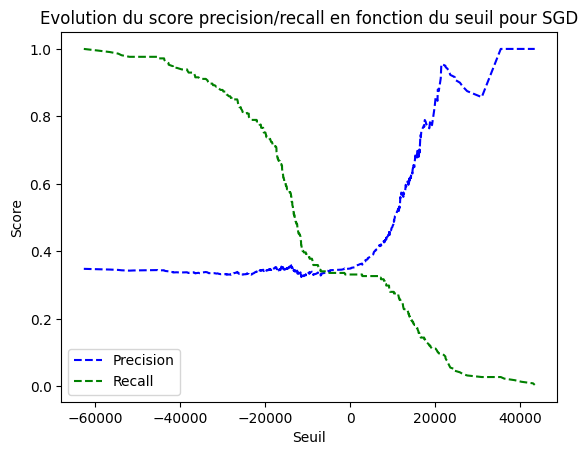

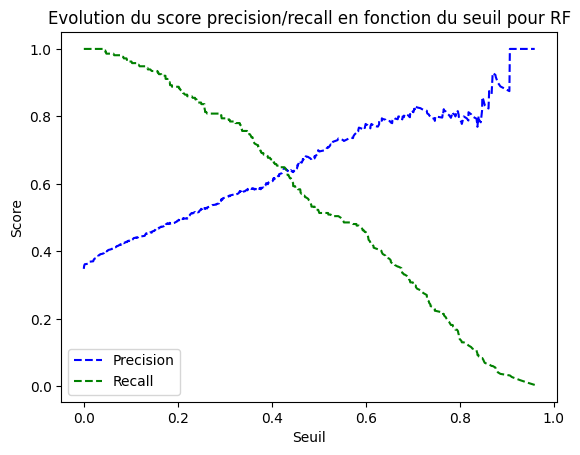

In [8]:
# Utiliser les thresholds, precisions et recall calculés
# Pour precisions et recalls ajouter [:-1] (ex precisions[:-1])

plt.plot(thresholds_sgd, precisions_sgd[:-1], "b--", label="Precision")
plt.plot(thresholds_sgd, recalls_sgd[:-1], "g--", label="Recall")
plt.title("Evolution du score precision/recall en fonction du seuil pour SGD")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.legend()
plt.show()

plt.plot(thresholds_rf, precisions_rf[:-1], "b--", label="Precision")
plt.plot(thresholds_rf, recalls_rf[:-1], "g--", label="Recall")
plt.title("Evolution du score precision/recall en fonction du seuil pour RF")
plt.xlabel("Seuil")
plt.ylabel("Score")
plt.legend()

plt.show()

Dans le cas du diagnostic du diabète, est-ce qu'on préfére maximiser le recall ou la precision ?

Dans le cas du diagnostic d'une maladie on ne souhaite surtout pas que notre modèle prédit une personne malade comme étant saine. On veut plutôt que notre modèle détecte le plus de malade possible, quitte à augmenter le nombre de personnes en bonne santé diagnostiquées comme étant malades.

On préfé donc maximiser le recall, quitte à avoir une precision plus faible.

### 8. Représenter graphiquement l'évolution de la precision en fonction du recall

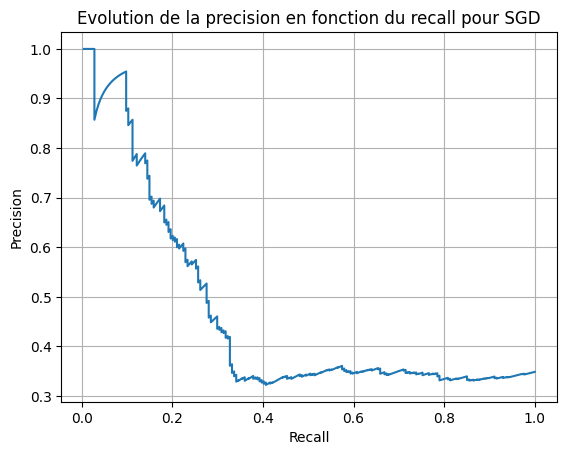

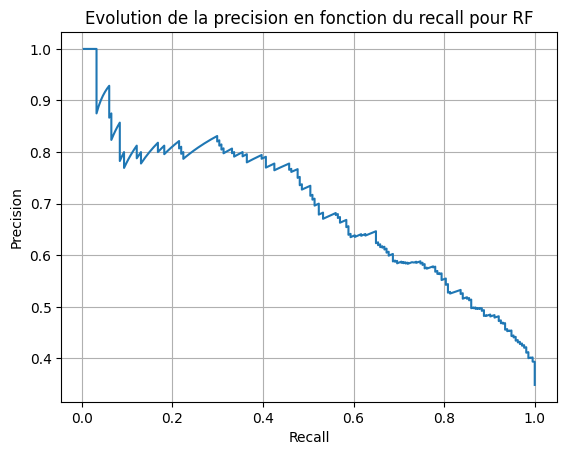

In [19]:
# Utiliser les precisions et recalls calculés
# Pour precisions et recalls ajouter [:-1] (ex precisions[:-1])

plt.plot(recalls_sgd[:-1], precisions_sgd[:-1])
plt.title("Evolution de la precision en fonction du recall pour SGD")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

plt.plot(recalls_rf[:-1], precisions_rf[:-1])
plt.title("Evolution de la precision en fonction du recall pour RF")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.grid()
plt.show()

### 9. Calculer le seuil pour obtenir un score de recall de 0.9

In [29]:
# Utiliser les thresholds calculés précedemment

treshold_90_recall_sgd = thresholds_sgd[np.argmax(precisions_sgd >= 0.90)]
print(treshold_90_recall_sgd)

treshold_90_recall_rf = thresholds_rf[np.argmax(recalls_rf >= 0.1)]
print(treshold_90_recall_rf)

21334.370077120217
0.0


### 10. A partir du seuil calculé, créer de nouvelles prédictions

In [11]:
# Utiliser les scores obtenus à l'étape 5

y_train_pred_90_sgd = (y_scores_sgd >= treshold_90_recall_sgd)
print(recall_score(y_train, y_train_pred_90_sgd))
print(precision_score(y_train, y_train_pred_90_sgd))

y_train_pred_90_rf = (y_scores_rf >= treshold_90_recall_rf)
print(recall_score(y_train, y_train_pred_90_rf))

0.09813084112149532
0.9130434782608695
1.0


### 11. Créer une matrice de confusion en utilisant ces nouvelles prédictions

In [30]:

cm_sgd = confusion_matrix(y_train, y_train_pred_90_sgd)
conf_matrix_sgd = pd.DataFrame(cm_sgd, index=["Actual no Diabete", "Actual Diabete"], columns=["Predicted no Diabete", "Predicted Diabete"])
print("Matrice de confusion pour le modèle SGD")
display(conf_matrix_sgd)

cm_rf = confusion_matrix(y_train, y_train_pred_90_rf)
conf_matrix_rf = pd.DataFrame(cm_rf, index=["Actual no Diabete", "Actual Diabete"], columns=["Predicted no Diabete", "Predicted Diabete"])
print("Matrice de confusion pour le modèle Random Forest")
display(conf_matrix_rf)

Matrice de confusion pour le modèle SGD


,Predicted no Diabete,Predicted Diabete
Actual no Diabete,398,2
Actual Diabete,193,21


Matrice de confusion pour le modèle Random Forest


,Predicted no Diabete,Predicted Diabete
Actual no Diabete,0,400
Actual Diabete,0,214


pour le test 
model.predict(sample, method=score ?)

### 12. Réaliser la courbe ROC

In [37]:
def plot_roc_curve(fpr, tpr, label=None):

    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.title("Courbe ROC")
    plt.xlabel("Taux de Faux Positif")
    plt.ylabel("Taux de Vrai Positif")
    plt.grid()

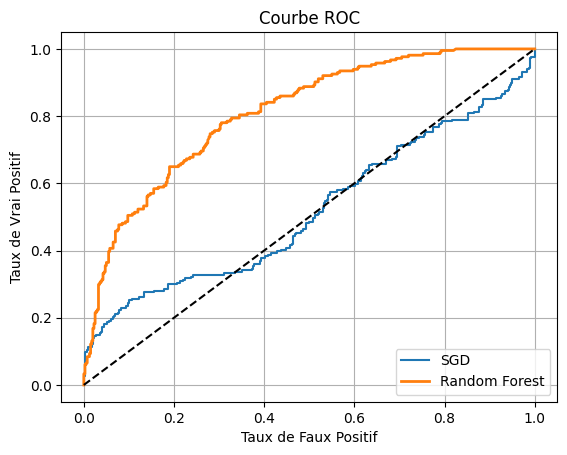

In [40]:
# Utiliser les scores obtenus à l'étape 5
# Reprensenter les deux modèles sur le même graphique

fpr_sgd, tpr_sgd, tresholds_sgd = roc_curve(y_train, y_scores_sgd)

fpr_rf, tpr_rf, tresholds_rf = roc_curve(y_train, y_scores_rf)

plt.plot(fpr_sgd, tpr_sgd, label="SGD")
plot_roc_curve(fpr_rf, tpr_rf, "Random Forest")
plt.legend(loc="lower right")
plt.show()

Comment analysez-vous ce graphique ?

### 13. Calculer l'AUC

In [42]:
print("AUC modèle SGD", roc_auc_score(y_train, y_scores_sgd))
print("AUC modèle Random Forest", roc_auc_score(y_train, y_scores_rf))

AUC modèle SGD 0.5181658878504674
AUC modèle Random Forest 0.8101810747663551
